<a href="https://colab.research.google.com/github/paulhodel/ml/blob/main/ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diabetes Outcomes Using Machine Learning
Academic session: September 2025-26

Diabetes is a major global health concern, affecting hundreds of millions of people worldwide.
Early detection of diabetes risk is essential for improving patient outcomes and reducing
healthcare costs.

In this group project, students will build a Machine Learning (ML) model to predict whether a
person is likely to develop diabetes based on diagnostic measurements such as glucose levels,
blood pressure, BMI, and age.

The dataset used in this project is a modified version of the Pima Indians Diabetes Database,
originally published on Kaggle. The modified dataset has been adapted for educational
purposes and includes additional variables and data-quality challenges designed to enhance
learning outcomes


**The Diabetes Pedigree Function (DPF)** is a continuous index representing hereditary risk for diabetes, derived from familial relationships and age factors

@TODO: find the citations.

## Project Setup
Loading the Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset.

To facilitate collaboration and version control, the raw dataset is stored on GitHub. This approach ensures easy access for all team members, maintains data consistency across environments, and supports transparent updates throughout the project.

In [ ]:
# Load the data and show the initial rows

url = 'https://raw.githubusercontent.com/paulhodel/ml/main/diabetes_extended_noisy.csv'
df = pd.read_csv(url)



In [ ]:
df.shape

(798, 11)

In [ ]:
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory
0,2,90.0,60,0.0,0.0,23.5,0.191,25,0,2,NaN
1,1,112.0,80,45.0,132.0,34.8,0.217,24,0,2,NaN
2,2,141.0,58,34.0,128.0,25.4,0.699,24,0,2,Moderate
3,6,91.0,0,0.0,0.0,29.8,0.501,31,0,1,Moderate
4,0,109.0,88,30.0,0.0,32.5,0.855,38,1,2,Strong


In [ ]:
display(df.tail())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory
793,5,139.0,64,35.0,140.0,28.6,0.411,26,0,2,Moderate
794,1,96.0,122,0.0,0.0,22.4,0.207,27,0,3,NaN
795,10,101.0,86,37.0,0.0,45.6,1.136,38,1,2,Strong
796,0,141.0,0,0.0,0.0,42.4,0.205,29,1,1,NaN
797,0,125.0,96,0.0,0.0,22.5,0.262,21,0,2,NaN


## Initial Data Inspection

An initial inspection of the dataset provides a summary of its structure, including data types, column names, and non-null counts. Running df.info() reveals that several features contain missing or incomplete values, which will need to be addressed during the data cleaning and preprocessing stages.


In [ ]:
# Summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               798 non-null    int64  
 1   Glucose                   798 non-null    float64
 2   BloodPressure             798 non-null    int64  
 3   SkinThickness             782 non-null    float64
 4   Insulin                   782 non-null    float64
 5   BMI                       782 non-null    float64
 6   DiabetesPedigreeFunction  798 non-null    float64
 7   Age                       798 non-null    int64  
 8   Outcome                   798 non-null    int64  
 9   PhysicalActivityLevel     798 non-null    int64  
 10  FamilyHistory             366 non-null    object 
dtypes: float64(5), int64(5), object(1)
memory usage: 68.7+ KB


We run the following method to gain a quick overview of the data and understand key statistics, including the mean, standard deviation, minimum, maximum, and quartiles. It helps identify problems such as zeros that don’t make sense, skewed distributions, or outliers.




In [ ]:
# Exploratory insight and diagnosis

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel
count,798.000000,798.000000,798.000000,782.000000,782.000000,782.000000,798.000000,798.000000,798.000000,798.000000
mean,3.864662,121.880202,69.002506,20.524297,78.827366,32.014066,0.467976,33.325815,0.344612,1.651629
std,3.364025,38.268527,19.410833,15.855907,113.574851,7.761333,0.329564,11.776531,0.475539,0.519570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238250,24.000000,0.000000,1.000000
50%,3.000000,116.500000,72.000000,23.000000,27.000000,32.000000,0.365000,29.000000,0.000000,2.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.618000,41.000000,1.000000,2.000000
max,17.000000,530.843990,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,3.000000


## Meta data

Create useful information based on Stanley Smith Stevens’ definitions of variable types - Nominal, Ordinal, Interval, and Ratio—to help identify and filter the available features.

## Initial Data Inspection



In [ ]:
# Create metadata about variable types based on Stevens' classification
info = []

for col in df.columns:
    if col == 'Outcome':
        vartype = 'nominal'
    elif col in ['FamilyHistory', 'PhysicalActivityLevel']:
        vartype = 'ordinal'
    elif col in ['DiabetesPedigreeFunction']:
        vartype = 'interval'
    elif col in [
        'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'Age'
    ]:
        vartype = 'ratio'
    else:
        vartype = 'unknown'  # Fallback for any unclassified columns

    info.append({'varname': col, 'vartype': vartype, })

# Convert to DataFrame for a clean display
meta = pd.DataFrame(info, columns=['varname', 'vartype'])
display(meta)


,varname,vartype
0,Pregnancies,ratio
1,Glucose,ratio
2,BloodPressure,ratio
3,SkinThickness,ratio
4,Insulin,ratio
5,BMI,ratio
6,DiabetesPedigreeFunction,interval
7,Age,ratio
8,Outcome,nominal
9,PhysicalActivityLevel,ordinal


#### Summary of the categories values

In [ ]:
categorical_cols = meta[meta['vartype'].isin(['nominal', 'ordinal'])]['varname'].tolist()
categorical_df = df[categorical_cols]
display(categorical_df.head())

,Outcome,PhysicalActivityLevel,FamilyHistory
0,0,2,NaN
1,0,2,NaN
2,0,2,Moderate
3,0,1,Moderate
4,1,2,Strong


## Data Quality Assessment

### Missing Data Summary

To better understand the extent and pattern of missing values in the dataset, we performed an in-depth analysis of the null entries. This step helps identify which features require data cleaning, imputation, or potential removal.

In [ ]:
# Count missing values
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_count / len(df)) * 100

# Create summary and filter out columns with no missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent.round(2)
})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Display the summary
display(missing_summary)

,Missing Values,Percentage (%)
FamilyHistory,432,54.14
SkinThickness,16,2.01
BMI,16,2.01
Insulin,16,2.01


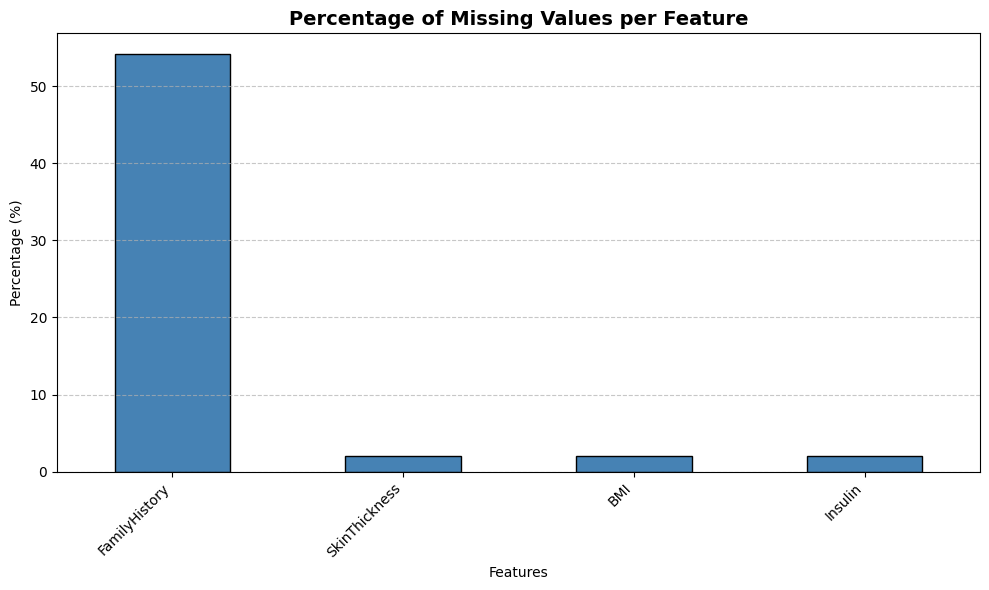

In [ ]:
# Plot only columns with missing values
plt.figure(figsize=(10, 6))
missing_summary['Percentage (%)'].plot(
    kind='bar', color='steelblue', edgecolor='black'
)
plt.title('Percentage of Missing Values per Feature', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Identifying Duplicate Records

As an absolutely important step, we will remove any duplicate records before proceeding with deeper feature and data analyses.



In [ ]:
# Identify duplicate records
duplicate_rows = df.duplicated().sum()

if duplicate_rows == 0:
    print("No duplicate records found in the dataset.")
else:
    print(f"Number of duplicate records: {duplicate_rows}")

Number of duplicate records: 28


### Detecting Invalid or Impossible Values

In this step, we look for values that don’t make sense in reality, such as zeros in BMI or Glucose. These are biologically impossible and usually mean the data was missing or entered incorrectly.





In [ ]:

# Columns where 0 is an impossible or invalid value
columns_with_impossible_zeros = [
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
]

# Calculate the number and percentage of zeros for each identified column
impossible_zero_counts = {}
for col in columns_with_impossible_zeros:
    if col in df.columns:  # safety check
        count = (df[col] == 0).sum()
        if count > 0:
            percentage = (count / len(df)) * 100
            impossible_zero_counts[col] = {
                'Impossible Zeros Count': count,
                'Percentage (%)': round(percentage, 2)
            }

# Convert to DataFrame for a clean display
if impossible_zero_counts:
    impossible_zeros_summary = pd.DataFrame.from_dict(
        impossible_zero_counts, orient='index'
    )
    print("\nSummary of Impossible Zero Values:")
    display(impossible_zeros_summary)

else:
    print("No impossible zero values found in the specified columns.")



Summary of Impossible Zero Values:


,Impossible Zeros Count,Percentage (%)
Glucose,5,0.63
BloodPressure,37,4.64
SkinThickness,229,28.70
Insulin,381,47.74
BMI,10,1.25


### Evaluating Data Consistency and Units








In [ ]:
import numpy as np
import pandas as pd

print("\n--- Structure and Completeness ---")
df_clean.info()
print("\nMissing values per column (%):")
display((df_clean.isna().mean().round(4) * 100).to_frame("missing_%").T)

print("\n--- Descriptive Statistics (numeric) ---")
display(df_clean.describe())

# 1) DTYPE CONSISTENCY (vs metadata)
print("\n--- Dtype consistency (metadata vs actual) ---")
numeric_intent = meta[meta['vartype'].isin(['ratio', 'interval'])]['varname'].tolist()
numeric_intent = [c for c in numeric_intent if c in df_clean.columns]  # safety
object_should_be_numeric = [c for c in numeric_intent if df_clean[c].dtype == 'object']
if object_should_be_numeric:
    print("Columns expected numeric but stored as object:", object_should_be_numeric)
    # Show up to 10 unique non-numeric tokens per column (without converting)
    for c in object_should_be_numeric:
        sample_vals = df_clean[c].dropna().astype(str).unique()[:10]
        print(f"  • {c} sample tokens:", sample_vals)
else:
    print("All expected numeric columns have numeric dtypes.")

# 2) BASIC VALUE SANITY (no negatives where impossible)
print("\n--- Sanity checks: negatives where impossible ---")
non_negative_cols = [c for c in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
                     if c in df_clean.columns]
for c in non_negative_cols:
    neg_n = (df_clean[c] < 0).sum()
    if neg_n > 0:
        print(f"  • {c}: {neg_n} negative values found")
if all((df_clean[c] >= 0).all() for c in non_negative_cols if c in df_clean.columns):
    print("No negative values found in non-negative physiological fields.")

# 3) PLAUSIBLE RANGE CHECKS (report only; tune thresholds as needed)
print("\n--- Plausible range checks (counts outside) ---")
bounds = {
    'Glucose':            (40, 600),   # mg/dL
    'BloodPressure':      (30, 200),   # mmHg (diastolic)
    'SkinThickness':      (1, 100),    # mm
    'Insulin':            (1, 900),    # µU/mL
    'BMI':                (10, 90),    # kg/m^2
    'Age':                (10, 120),   # years
    'Pregnancies':        (0, 25),     # count
}
for c, (lo, hi) in bounds.items():
    if c in df.columns:
        mask = df[c].notna() & (~np.isinf(df_clean[c]))
        out_lo = (df.loc[mask, c] < lo).sum()
        out_hi = (df.loc[mask, c] > hi).sum()
        total = mask.sum()
        if out_lo + out_hi > 0:
            print(f"  • {c}: {out_lo+out_hi} outside [{lo}, {hi}] "
                  f"({(out_lo+out_hi)/max(total,1)*100:.2f}% of non-missing)")
        else:
            print(f"  • {c}: all values within [{lo}, {hi}] (based on non-missing)")

# 4) CATEGORICAL / ORDINAL QUICK LOOK (optional)
print("\n--- Categorical/ordinal overview (top levels) ---")
cat_cols = meta[meta['vartype'].isin(['nominal','ordinal'])]['varname'].tolist()
cat_cols = [c for c in cat_cols if c in df.columns]
for c in cat_cols:
    vc = df[c].value_counts(dropna=False).head(5)
    print(f"\n{c} (top 5):")
    display(vc.to_frame("count").T)

print("\nChecklist:")
print("• If any numeric-intended columns are 'object', plan a controlled conversion later.")
print("• Review out-of-range counts; decide on domain-driven handling in the cleaning step.")
print("• Confirm units (e.g., Glucose mg/dL) are consistent with expected ranges.")



--- Structure and Completeness ---
<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 0 to 797
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               770 non-null    int64  
 1   Glucose                   765 non-null    float64
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             531 non-null    float64
 4   Insulin                   386 non-null    float64
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  770 non-null    float64
 7   Age                       770 non-null    int64  
 8   Outcome                   770 non-null    int64  
 9   PhysicalActivityLevel     770 non-null    int64  
 10  FamilyHistory             359 non-null    object 
dtypes: float64(6), int64(4), object(1)
memory usage: 72.2+ KB

Missing values per column (%):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory
missing_%,0.0,0.65,4.55,31.04,49.87,3.38,0.0,0.0,0.0,0.0,53.38



--- Descriptive Statistics (numeric) ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel
count,770.000000,765.000000,735.000000,531.000000,386.000000,744.000000,770.000000,770.000000,770.000000,770.000000
mean,3.851948,122.814903,72.409524,29.033898,154.992228,32.431720,0.472235,33.229870,0.348052,1.651948
std,3.368778,37.366641,12.369522,10.492170,118.038811,6.943742,0.331210,11.749682,0.476662,0.518478
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.000000,64.000000,21.000000,76.000000,27.475000,0.244000,24.000000,0.000000,1.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,2.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626750,41.000000,1.000000,2.000000
max,17.000000,530.843990,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,3.000000



--- Dtype consistency (metadata vs actual) ---
All expected numeric columns have numeric dtypes.

--- Sanity checks: negatives where impossible ---

--- Plausible range checks (counts outside) ---
  • Glucose: 5 outside [40, 600] (0.65% of non-missing)
  • BloodPressure: 36 outside [30, 200] (4.68% of non-missing)
  • SkinThickness: 223 outside [1, 100] (29.58% of non-missing)
  • Insulin: 368 outside [1, 900] (48.81% of non-missing)
  • BMI: 10 outside [10, 90] (1.33% of non-missing)
  • Age: all values within [10, 120] (based on non-missing)
  • Pregnancies: all values within [0, 25] (based on non-missing)

--- Categorical/ordinal overview (top levels) ---

Outcome (top 5):


Outcome,0,1
count,523,275



PhysicalActivityLevel (top 5):


PhysicalActivityLevel,2,1,3
count,486,295,17



FamilyHistory (top 5):


FamilyHistory,NaN,Moderate,Strong
count,432,257,109



Checklist:
• If any numeric-intended columns are 'object', plan a controlled conversion later.
• Review out-of-range counts; decide on domain-driven handling in the cleaning step.
• Confirm units (e.g., Glucose mg/dL) are consistent with expected ranges.


### Identifying Outliers




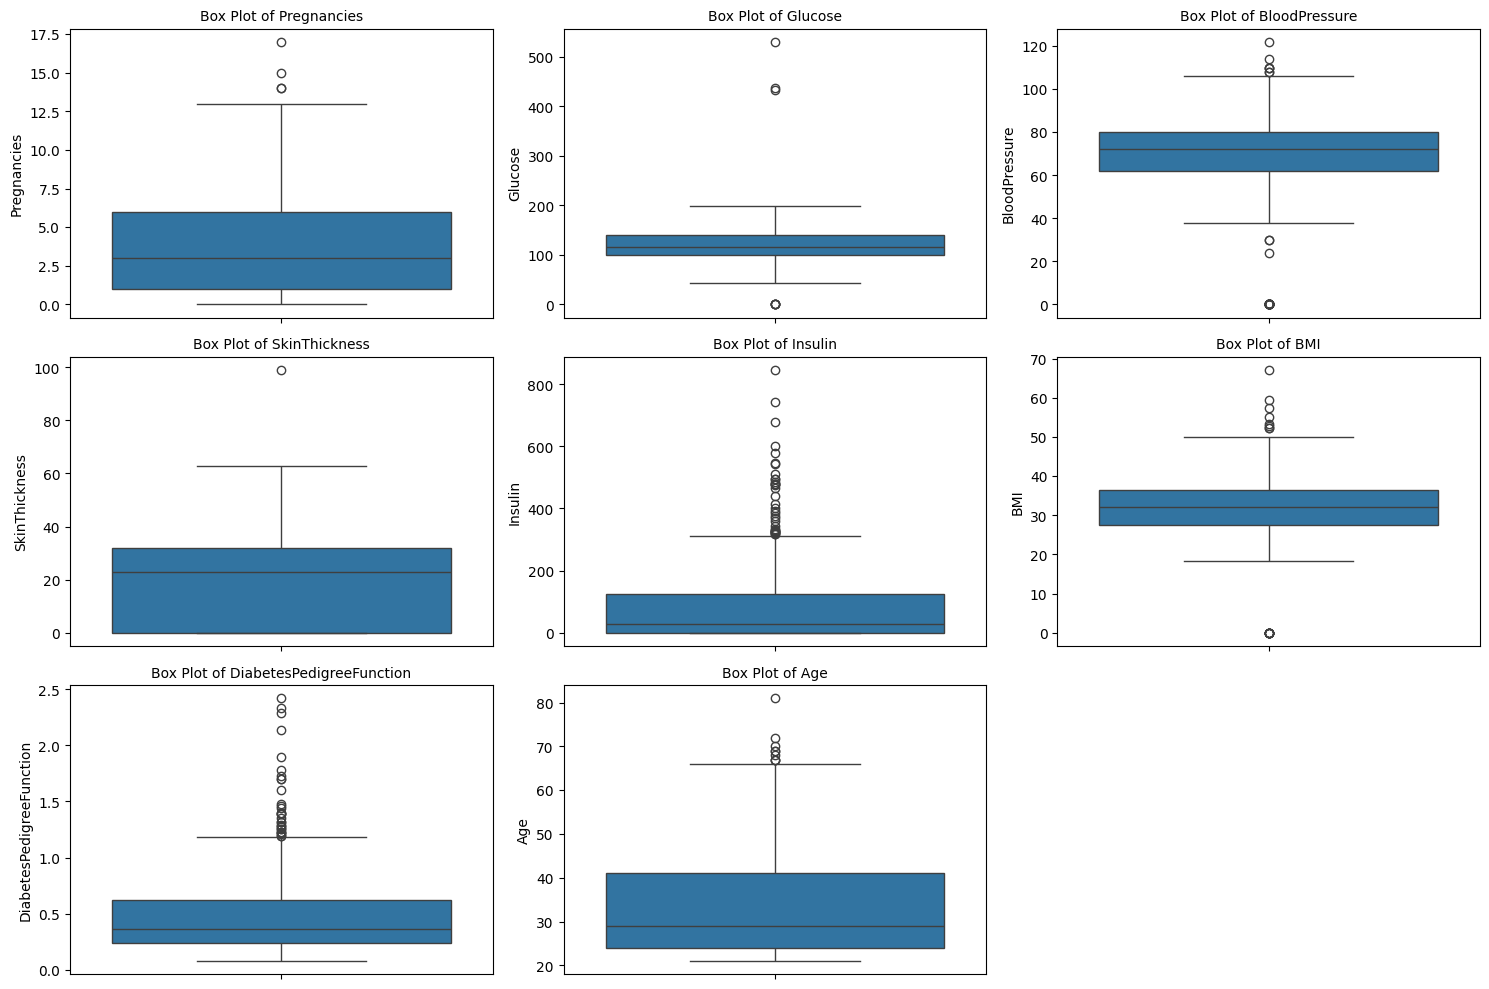

In [ ]:

numeric_cols = meta[meta['vartype'].isin(['ratio', 'interval'])]['varname'].tolist()
numeric_cols = [col for col in numeric_cols if col in df.columns]

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}', fontsize=10)
    plt.ylabel(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()


# Visualizing Correlation

The plots below visualize the relationships between several numerical features in our dataset, specifically focusing on how these relationships differ based on the Outcome variable (whether a person has diabetes or not).

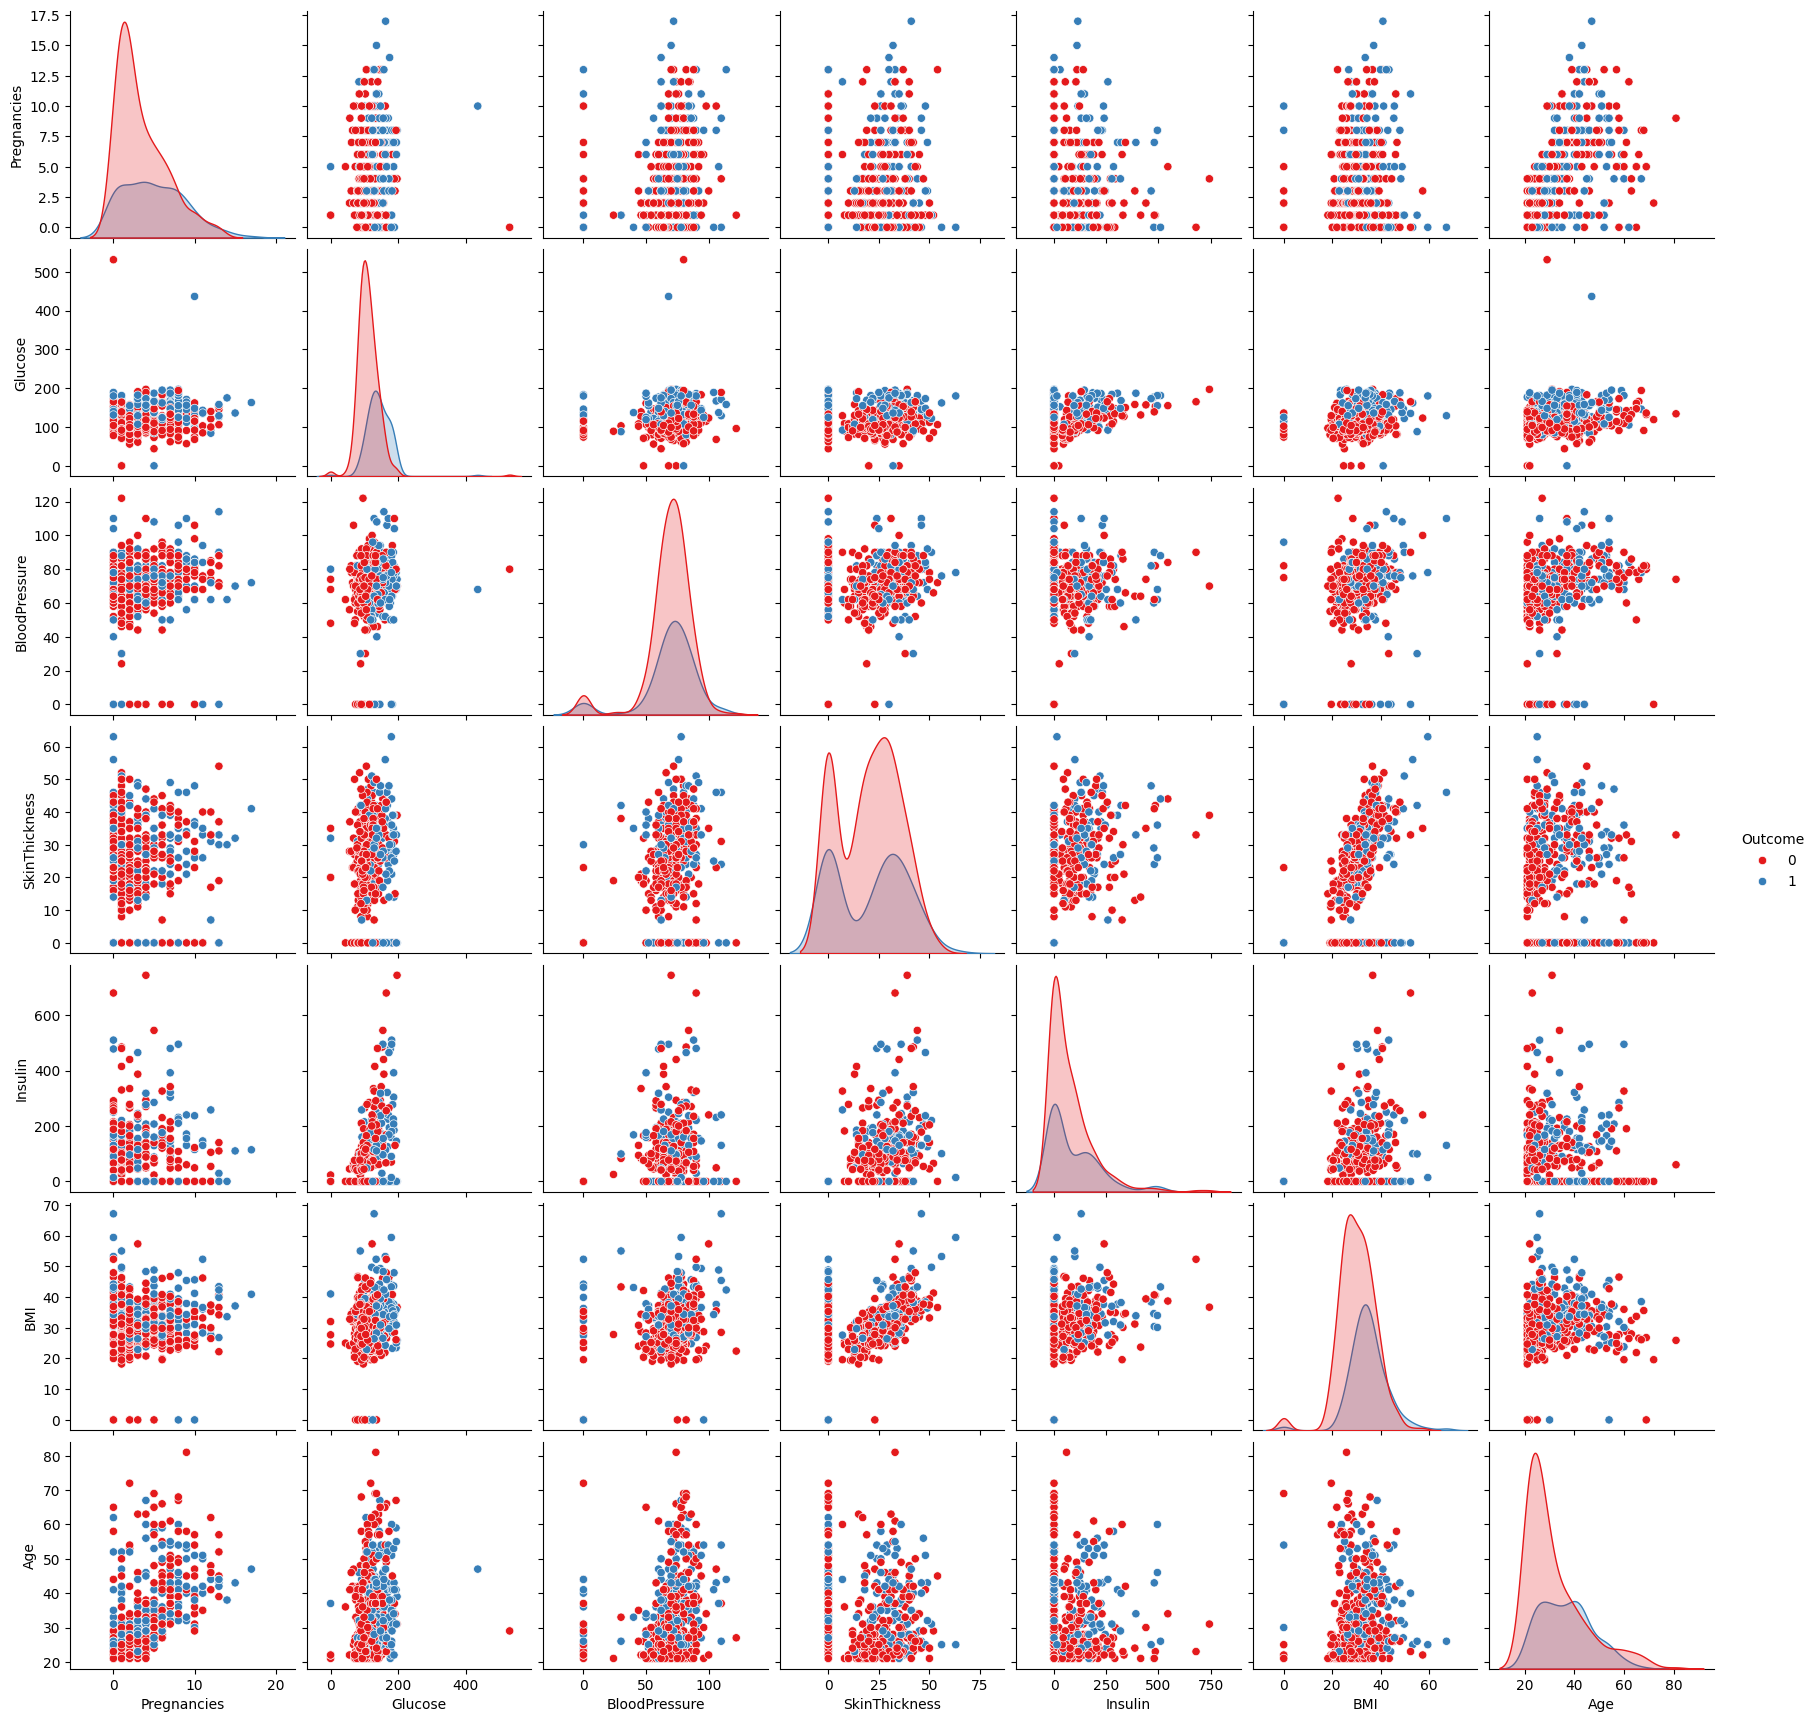

In [ ]:
# Visualise the features with strong correlations in the Real (Interval) variables using Pairplot
# Just a mini edit, by Redi. To see if we are able to collaborate on the same doc together.

sample = df.sample(500)
var = ['Pregnancies', 'Glucose',
       'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI',
       'Age', 'Outcome']
sample = sample[var]
sns.pairplot(sample,  hue='Outcome',
             palette = 'Set1', diag_kind='kde')
plt.show()


## Data Cleaning

### Handling Missing Values (Imputation or Removal)


### Removing or Resolving Duplicates

### Treating Outliers

### Correcting Data Types (Numeric, Categorical, Date)

### Fixing Invalid or Placeholder Values


## Data Transformation and Preparation
### Encoding Categorical Variables (Label, One-Hot, Ordinal)
### Scaling and Normalizing Numeric Variables
### Handling Skewness and Distributions
### Feature Engineering (Creating Derived Variables)
### Data Integration or Merging (if multiple sources)

## Feature Understanding and Statistics
### Univariate Analysis (Single Variable Distributions)
### Bivariate Analysis (Feature vs. Target Relationships)
### Multivariate Analysis (Interactions and Correlations)
### Statistical Tests (Correlation, Chi-Square, ANOVA)

## Data Visualization
### Distribution and Density Plots
### Boxplots and Violin Plots
### Scatterplots and Pairplots
### Correlation Heatmaps
### Categorical Plots (Countplots, Bar Charts)
### Trend and Relationship Visualization

## Insights and Reporting
### Summary of Data Quality
### Key Statistical and Visual Findings
### Feature Relationships and Patterns
### Potential Predictors for Modeling
### Recommendations and Next Steps
